In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

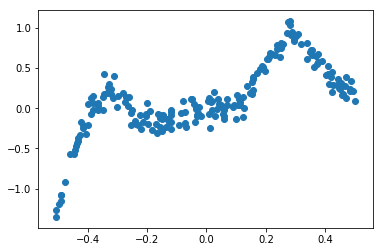

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

In [7]:
# Relu with different gradient for zero region

class ReluNeg(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.vstack((np.maximum(0, x), np.minimum(0, x)))

    def backward(self, output_delta):
        split1, split2 = np.split(output_delta, 2)
        output_delta = split1+split2
        return np.where(self.x >= 0, output_delta, self.x)


[[0.28198359]
 [0.29119453]
 [0.28550019]
 [0.29140672]
 [0.25762278]
 [0.27389947]
 [0.28317769]
 [0.2825436 ]
 [0.24976893]
 [0.25404654]
 [0.26549304]
 [0.24557494]
 [0.25545431]
 [0.25139135]
 [0.24368721]
 [0.24052235]
 [0.23468071]
 [0.24948775]
 [0.24028256]
 [0.22057407]
 [0.22337061]
 [0.22983933]
 [0.23074786]
 [0.22415715]
 [0.20992259]
 [0.22008468]
 [0.19997552]
 [0.20983303]
 [0.21991778]
 [0.18975955]
 [0.19330892]
 [0.18509342]
 [0.19166797]
 [0.21053828]
 [0.20017607]
 [0.1888059 ]
 [0.19961655]
 [0.18525312]
 [0.18107873]
 [0.1996137 ]
 [0.178989  ]
 [0.17129967]
 [0.1522465 ]
 [0.14739422]
 [0.17313805]
 [0.14564459]
 [0.15755485]
 [0.13853571]
 [0.16109059]
 [0.15698041]
 [0.13706989]
 [0.14505044]
 [0.15093915]
 [0.12230811]
 [0.11608842]
 [0.1332353 ]
 [0.12919535]
 [0.12741394]
 [0.11267877]
 [0.11713468]
 [0.10917135]
 [0.09604645]
 [0.09723645]
 [0.11741077]
 [0.10637566]
 [0.0841256 ]
 [0.06792052]
 [0.09046403]
 [0.08975483]
 [0.08588801]
 [0.07738039]
 [0.08

ValueError: operands could not be broadcast together with shapes (200,1) (100,1) (200,1) 

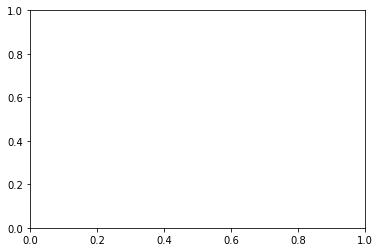

In [9]:
optimizer = tnn.SGD()
la1 = tnn.NonLinearLayer(1, 1, activation=Maxout(), optimizer=optimizer)


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1_ = la1.forward(x_data)
    a11, a12 = np.split(a1_, 2)
    a1 = a11 + a12
    print(a11, a12)
    print(a1)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    
    dx = la1.backward(dy)
    
    la1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', la1.weights)
        print("Biases 1", '\n', la1.bias)
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

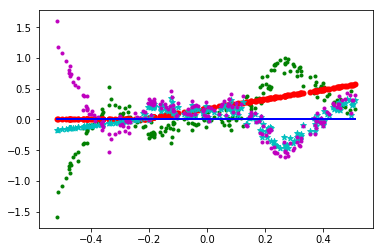

In [72]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

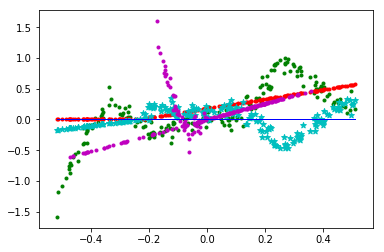

In [73]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is linear relationship between dx and dy

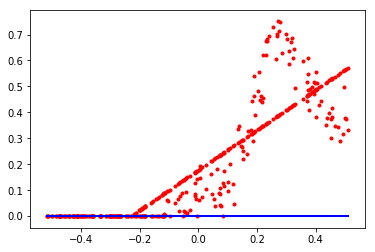

In [75]:
_a1 = la1.forward(x_data - dx)
_dy = tnn.MseLoss.del_loss(_a1, y_data)
_dx = la1.backward(_dy)

# plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, _dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
# plt.scatter(x, _dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, _a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.plot(x, np.zeros_like(x), c='b', lw=2)